In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

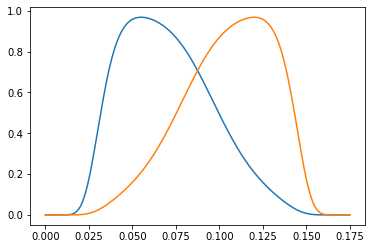

In [2]:
awg_sampling_rate = 1
lengthRepump=0.175*awg_sampling_rate
tRepump,tRepumpStep = np.linspace(0,lengthRepump, int(lengthRepump*1000), retstep=True)

a=10
n=4
c=0.175/3
def stokes_shape_plot(t,T):
    return (np.exp(-((t - (T/2))/c)**(2*n))*np.cos(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T)))))
def shape_pump_plot(t,T):
    return (np.exp(-((t - (T/2))/c)**(2*n))*np.sin(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T)))))

plt.plot(tRepump, stokes_shape_plot(tRepump, lengthRepump))
plt.plot(tRepump, shape_pump_plot(tRepump, lengthRepump))
plt.show()                                                                      

In [2]:
def tophat(num_samples, ramp_samples=30):
    if num_samples < 2 * ramp_samples:
        raise ValueError("num_samples must be at least twice ramp_samples.")
    
    tophat = np.ones(num_samples)

    # Create the ramp using a half-cosine window
    ramp_up = 0.5 * (1 - np.cos(np.pi * np.arange(ramp_samples) / ramp_samples))
    ramp_down = ramp_up[::-1]

    # Apply ramps
    tophat[:ramp_samples] = ramp_up
    tophat[-ramp_samples:] = ramp_down

    return tophat

In [3]:
def export_to_csv(array, scale, filepath, filename):
    try:
        full_path = f"{filepath}/{filename}"
        
        rescaled_arr=np.zeros((len(array)))
        for i, el in enumerate(array):
            if abs(el)<10**(-9):
                rescaled_arr[i]=0
            else:
                rescaled_arr[i]=scale*array[i]

        np.savetxt(full_path, rescaled_arr, delimiter=',',newline=',',fmt='%.10f')
        # Remove trailing comma from the file
        with open(full_path, 'r+') as f:
            f.seek(0, 2)  # Move the cursor to the end of the file
            f.seek(f.tell() - 1, 0)  # Move one character back from the end
            if f.read(1) == ',':  # Check if the last character is a comma
                f.seek(f.tell() - 1, 0)  # Move one character back from the end again
                f.truncate()  # Remove the trailing comma
        # Append a newline at the end of the file
        with open(full_path, 'a') as f:
            f.write('\n')

        print(f"Data successfully exported to {full_path}")
    except Exception as e:
        print(f"Error exporting data to {full_path}: {e}")

In [10]:
scale_list=[0.3]
pulse_len=[500000]

for scale in scale_list:
    for pulse_len in pulse_len:
        export_to_csv(tophat(pulse_len),scale, 'tophat', f'tophat_{int(pulse_len/1000)}mus_{scale}.csv')

Data successfully exported to tophat/tophat_500mus_0.3.csv
